Original shape: (1427, 2100, 3)


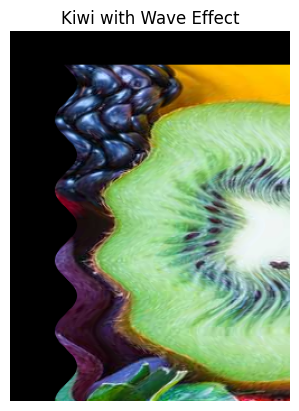

In [29]:
# bài 1
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from scipy.ndimage import map_coordinates

data = iio.imread('fruit.jpg')
print("Original shape:", data.shape)
kiwi = data[470:770, 200:400]  
h, w = kiwi.shape[:2]
translated = np.zeros((h + 30, w + 50, 3), dtype=kiwi.dtype)
translated[30:30+h, 50:50+w] = kiwi
coords_y, coords_x = np.meshgrid(np.arange(translated.shape[0]), np.arange(translated.shape[1]), indexing='ij')
amplitude = 10
frequency = 0.1
coords_x_wave = coords_x + amplitude * np.sin(frequency * coords_y)
warped = np.zeros_like(translated)
for c in range(3):  
    warped[..., c] = map_coordinates(translated[..., c], [coords_y, coords_x_wave], order=1, mode='reflect')
output_path = 'kiwi_wave.jpg'
iio.imsave(output_path, warped)

plt.imshow(warped)
plt.title("Kiwi with Wave Effect")
plt.axis('off')
plt.show()



In [3]:
#bài 2
import numpy as np
from PIL import Image, ImageOps
import imageio.v2 as iio

papaya_img = Image.open("dudu.jpg").convert("RGBA")
watermelon_img = Image.open("dua.jpg").convert("RGBA")
max_height = 300
papaya_img = ImageOps.contain(papaya_img, (int(max_height * 1.2), max_height))
watermelon_img = ImageOps.contain(watermelon_img, (int(max_height * 1.2), max_height))
papaya_np = np.array(papaya_img)
watermelon_np = np.array(watermelon_img)
def apply_gradient(image_np, color1, color2):
    h, w, _ = image_np.shape
    alpha = image_np[..., 3] / 255.0  
    gradient = np.linspace(0, 1, h).reshape(-1, 1, 1)
    gradient_rgb = (1 - gradient) * np.array(color1) + gradient * np.array(color2)
    gradient_img = np.tile(gradient_rgb, (1, w, 1))
    result = (gradient_img * alpha[..., None]).astype(np.uint8)
    return np.dstack((result, (alpha * 255).astype(np.uint8)))

papaya_colored = apply_gradient(papaya_np, [255, 0, 0], [0, 255, 0])

watermelon_colored = apply_gradient(watermelon_np, [255, 255, 0], [128, 0, 128])

combined_width = papaya_colored.shape[1] + watermelon_colored.shape[1]
combined_height = max(papaya_colored.shape[0], watermelon_colored.shape[0])
combined = np.zeros((combined_height, combined_width, 4), dtype=np.uint8)

combined[:papaya_colored.shape[0], :papaya_colored.shape[1]] = papaya_colored
combined[:watermelon_colored.shape[0], papaya_colored.shape[1]:] = watermelon_colored

output_img = Image.fromarray(combined, mode="RGBA")
output_img.save("papaya_watermelon_gradient.png")


In [ ]:
# bài 3
from PIL import Image, ImageOps
import numpy as np
from scipy.ndimage import rotate

mountain_path = "nui.jpg"
boat_path = "thuyen.jpg"

mountain_img = Image.open(mountain_path).convert("RGBA")
boat_img = Image.open(boat_path).convert("RGBA")
max_height = 300
mountain_img = ImageOps.contain(mountain_img, (int(max_height * 1.5), max_height))
boat_img = ImageOps.contain(boat_img, (int(max_height * 1.5), max_height))

mountain_np = np.array(mountain_img)
boat_np = np.array(boat_img)

mountain_rotated = rotate(mountain_np, angle=45, reshape=False, order=1, mode='constant', cval=0).astype(np.uint8)
boat_rotated = rotate(boat_np, angle=45, reshape=False, order=1, mode='constant', cval=0).astype(np.uint8)

mountain_mirror = np.flipud(mountain_rotated)
boat_mirror = np.flipud(boat_rotated)

mountain_rotated_img = Image.fromarray(mountain_rotated, mode="RGBA")
mountain_mirror_img = Image.fromarray(mountain_mirror, mode="RGBA")
boat_rotated_img = Image.fromarray(boat_rotated, mode="RGBA")
boat_mirror_img = Image.fromarray(boat_mirror, mode="RGBA")

canvas_width = max(mountain_rotated_img.width, boat_rotated_img.width)
canvas_height = (
    mountain_rotated_img.height + mountain_mirror_img.height +
    boat_rotated_img.height + boat_mirror_img.height + 40
)

canvas = Image.new("RGBA", (canvas_width, canvas_height), (255, 255, 255, 255))

y = 0
canvas.paste(mountain_rotated_img, (0, y), mountain_rotated_img)
y += mountain_rotated_img.height + 5
canvas.paste(mountain_mirror_img, (0, y), mountain_mirror_img)
y += mountain_mirror_img.height + 10
canvas.paste(boat_rotated_img, (0, y), boat_rotated_img)
y += boat_rotated_img.height + 5
canvas.paste(boat_mirror_img, (0, y), boat_mirror_img)

canvas.convert("RGB").save("mountain_boat_mirror.jpg", "JPEG")


In [8]:
# bài 4
import numpy as np
from PIL import Image
from scipy.ndimage import map_coordinates, zoom
import imageio.v2 as iio

pagoda_img = Image.open("chua.jpg").convert("RGB")
pagoda_np = np.array(pagoda_img)
scaled_pagoda = zoom(pagoda_np, (5, 5, 1), order=1)
height, width, _ = scaled_pagoda.shape
coords_y, coords_x = np.meshgrid(np.arange(height), np.arange(width), indexing='ij')

amplitude = 50                   
frequency = 2 * np.pi / 300      
warp_x = coords_x + amplitude * np.sin(coords_y * frequency)
warp_y = coords_y
warped = np.zeros_like(scaled_pagoda)
for c in range(3):  
    warped[..., c] = map_coordinates(scaled_pagoda[..., c], [warp_y, warp_x], order=1, mode='reflect')

output_path = "pagoda_warped.jpg"
iio.imsave(output_path, warped)


=== CHỌN ẢNH ===
1. dudu.jpg
2. dua.jpg
3. nui.jpg

--- MENU BIẾN ĐỔI ẢNH ---
1. Tịnh tiến
2. Xoay
3. Phóng to / Thu nhỏ
4. Làm mờ Gaussian
5. Biến dạng sóng (wave warp)


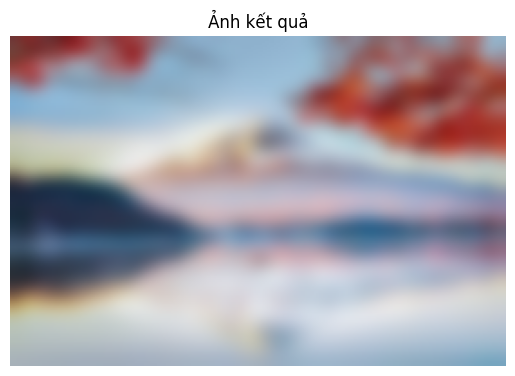

ValueError: unknown file extension: 

In [11]:
#bài 5
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import shift, rotate, gaussian_filter, zoom, map_coordinates

image_paths = {
    "1": "dudu.jpg",
    "2": "dua.jpg",
    "3": "nui.jpg"
}

def show_image(image, title="Ảnh kết quả"):
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

def apply_transformation(image):
    print("\n--- MENU BIẾN ĐỔI ẢNH ---")
    print("1. Tịnh tiến")
    print("2. Xoay")
    print("3. Phóng to / Thu nhỏ")
    print("4. Làm mờ Gaussian")
    print("5. Biến dạng sóng (wave warp)")
    choice = input("Chọn thao tác (1-5): ")

    img_array = np.array(image)

    if choice == "1":
        dx = int(input("Nhập số pixel tịnh tiến theo trục X: "))
        dy = int(input("Nhập số pixel tịnh tiến theo trục Y: "))
        result = shift(img_array, shift=[dy, dx, 0])
    elif choice == "2":
        angle = float(input("Nhập góc xoay (độ): "))
        reshape = input("Có reshape không? (y/n): ").lower() == 'y'
        result = rotate(img_array, angle=angle, reshape=reshape, order=1, mode='constant', cval=0)
    elif choice == "3":
        zoom_factor = float(input("Nhập hệ số phóng to/thu nhỏ (ví dụ 0.5, 2.0): "))
        result = zoom(img_array, (zoom_factor, zoom_factor, 1))
    elif choice == "4":
        sigma = float(input("Nhập giá trị sigma cho làm mờ Gaussian: "))
        result = gaussian_filter(img_array, sigma=[sigma, sigma, 0])
    elif choice == "5":
        amplitude = float(input("Nhập biên độ sóng (amplitude): "))
        height, width, _ = img_array.shape
        coords_y, coords_x = np.meshgrid(np.arange(height), np.arange(width), indexing='ij')
        freq = 2 * np.pi / 300
        wave_x = coords_x + amplitude * np.sin(coords_y * freq)
        wave_y = coords_y
        result = np.zeros_like(img_array)
        for c in range(3):
            result[..., c] = map_coordinates(img_array[..., c], [wave_y, wave_x], order=1, mode='reflect')
    else:
        print("Lựa chọn không hợp lệ.")
        return None

    return Image.fromarray(result.astype(np.uint8))

def main():
    print("=== CHỌN ẢNH ===")
    for key, path in image_paths.items():
        print(f"{key}. {path}")
    img_choice = input("Chọn ảnh (1-3): ")

    if img_choice not in image_paths:
        print("Lựa chọn không hợp lệ.")
        return

    img = Image.open(image_paths[img_choice]).convert("RGB")
    transformed_img = apply_transformation(img)

    if transformed_img:
        show_image(transformed_img)
        save = input("Bạn có muốn lưu ảnh không? (y/n): ")
        if save.lower() == 'y':
            filename = input("Nhập tên file lưu (vd: output.jpg): ")
            transformed_img.save(filename)
            print("✅ Ảnh đã được lưu thành công.")

if __name__ == "__main__":
    import os
    from PIL import ImageDraw

    def create_sample_images():
        if not os.path.exists("image1.jpg"):
            img1 = Image.new("RGB", (200, 200), (255, 0, 0))
            draw1 = ImageDraw.Draw(img1)
            draw1.text((50, 90), "Image 1", fill=(255, 255, 255))
            img1.save("image1.jpg")

        if not os.path.exists("image2.jpg"):
            img2 = Image.new("RGB", (250, 150), (0, 255, 0))
            draw2 = ImageDraw.Draw(img2)
            draw2.text((70, 60), "Image 2", fill=(0, 0, 0))
            img2.save("image2.jpg")

        if not os.path.exists("image3.jpg"):
            img3 = Image.new("RGB", (200, 200), (0, 0, 255))
            draw3 = ImageDraw.Draw(img3)
            draw3.text((50, 90), "Image 3", fill=(255, 255, 255))
            img3.save("image3.jpg")

    create_sample_images()
    main()
